In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer 

In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_fourier_z = pd.read_csv(os.path.join(folder_path, "features_fourier_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_fourier_mm = pd.read_csv(os.path.join(folder_path, "features_fourier_all_minmax.csv"))

In [3]:
df_fourier_z

,mean_magnitude,std_magnitude,low_freq_magnitude,high_freq_magnitude,filename,label
0,-0.675069,-0.789859,-0.897021,-1.099034,callo_1.png,smaller
1,-0.332674,0.421457,-0.087640,0.128736,callo_10.png,smaller
2,-0.726203,-1.157138,-0.882415,-0.876548,callo_100.png,smaller
3,-0.624806,-0.816866,-0.490506,-0.490618,callo_101.png,smaller
4,-1.317448,-1.644363,-1.428906,-1.326237,callo_102.png,smaller
...,...,...,...,...,...,...
532,0.749086,0.945783,0.887860,0.885922,callo_95.png,higher
533,0.989613,0.780056,1.338128,1.304986,callo_96.png,higher
534,0.873905,0.820400,0.651903,0.660034,callo_97.png,higher
535,0.896289,1.520130,0.721742,1.004862,callo_98.png,higher


In [4]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_fourier_z_cl= df_fourier_z.drop(columns=['filename', 'label'])

Se realiza clustering con k-means. Para averiguar cual va a ser el mejor valor de k o clusters se aplica el método
del "codo". También se simularán con diferentes números de clusteres la silueta.

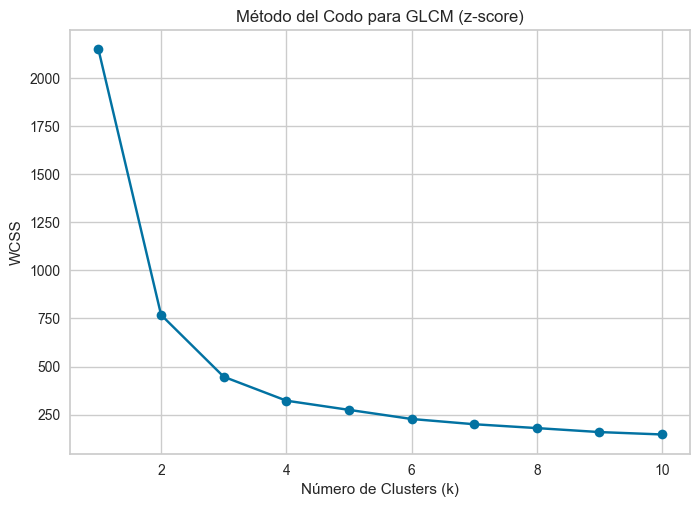

In [5]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_fourier_z_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (z-score)')
plt.grid(True)
plt.show()

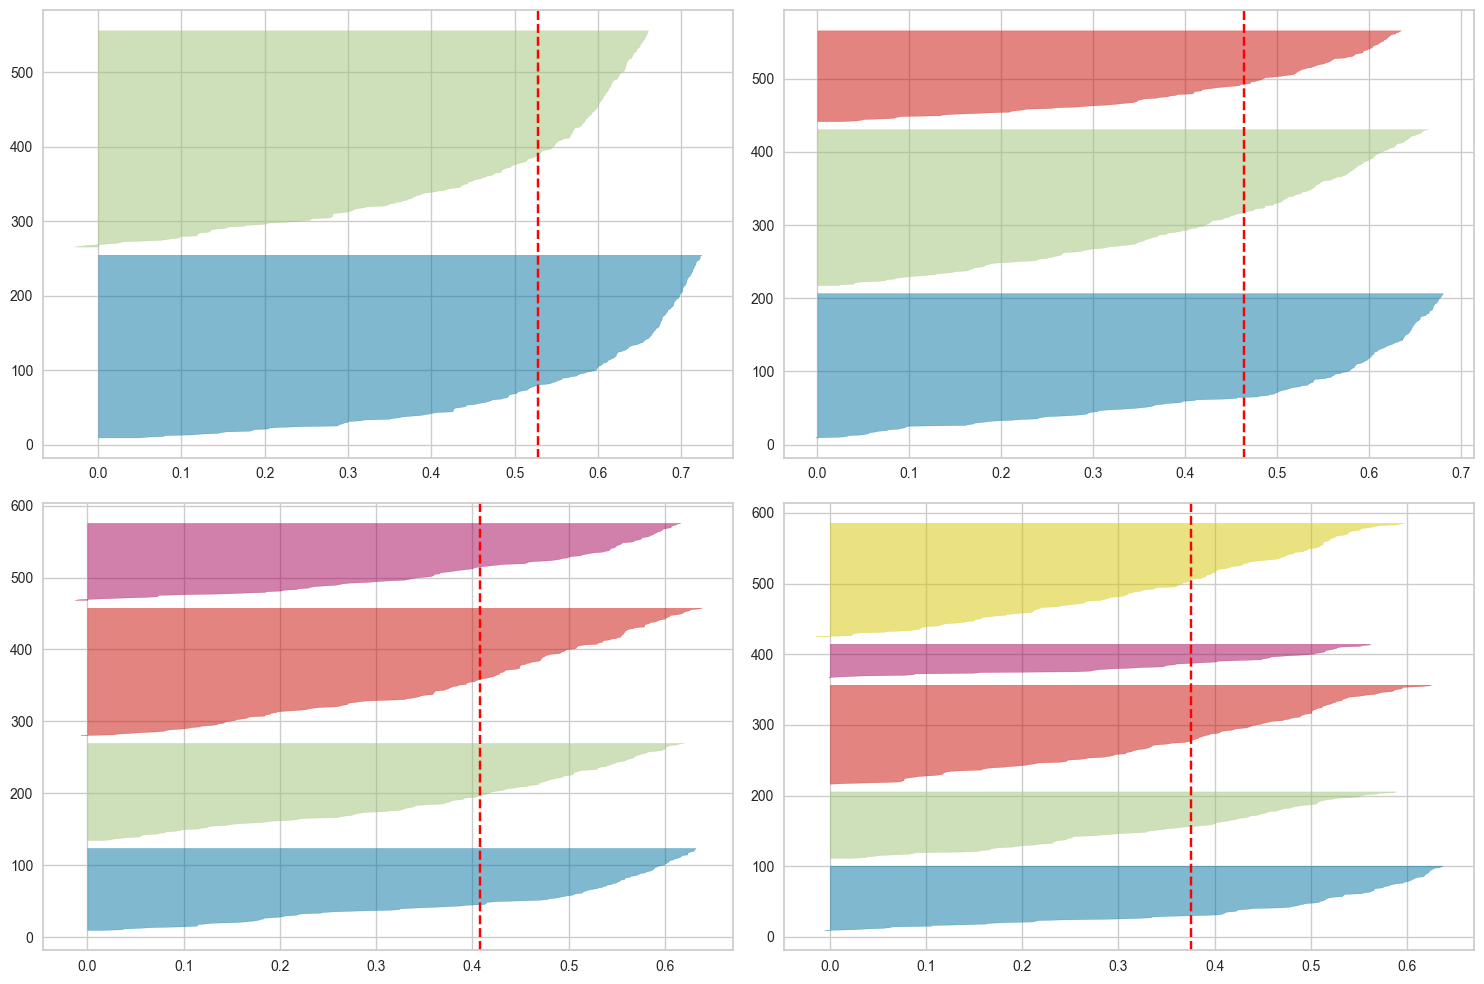

In [6]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_fourier_z_cl)  

plt.tight_layout()
plt.show()

Aunque se obtiene mejor valor de silueta con dos clusteres, pero se van a probar 3 teniendo en cuenta ambos criterios

In [7]:
#Modelo k-means
cluster_fourier_z= KMeans(init='k-means++',n_clusters=3,random_state=42)
cluster_fourier_z.fit(df_fourier_z_cl)   

KMeans(n_clusters=3, random_state=42)

In [8]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_fourier_z['Cluster'] = cluster_fourier_z.labels_
pd.crosstab(df_fourier_z['Cluster'], df_fourier_z['label'])

label,higher,smaller
Cluster,,
0,133,93
1,123,6
2,12,170


In [9]:
silhouette_avg_fourier_z = silhouette_score(df_fourier_z_cl, cluster_fourier_z.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_fourier_z}')

Índice de silueta promedio: 0.46126352832744827


Ahora se realiza lo mismo pero con la normalización min-max

In [10]:
df_fourier_mm

,mean_magnitude,std_magnitude,low_freq_magnitude,high_freq_magnitude,filename,label
0,0.321215,0.291837,0.274240,0.234906,callo_1.png,smaller
1,0.382919,0.518457,0.426258,0.434512,callo_10.png,smaller
2,0.312000,0.223125,0.276983,0.271077,callo_100.png,smaller
3,0.330273,0.286785,0.350592,0.333820,callo_101.png,smaller
4,0.205450,0.131972,0.174341,0.197968,callo_102.png,smaller
...,...,...,...,...,...,...
532,0.577865,0.616550,0.609478,0.557612,callo_95.png,higher
533,0.621211,0.585545,0.694047,0.625742,callo_96.png,higher
534,0.600359,0.593093,0.565160,0.520888,callo_97.png,higher
535,0.604393,0.724002,0.578277,0.576949,callo_98.png,higher


In [11]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_fourier_mm_cl= df_fourier_mm.drop(columns=['filename', 'label'])

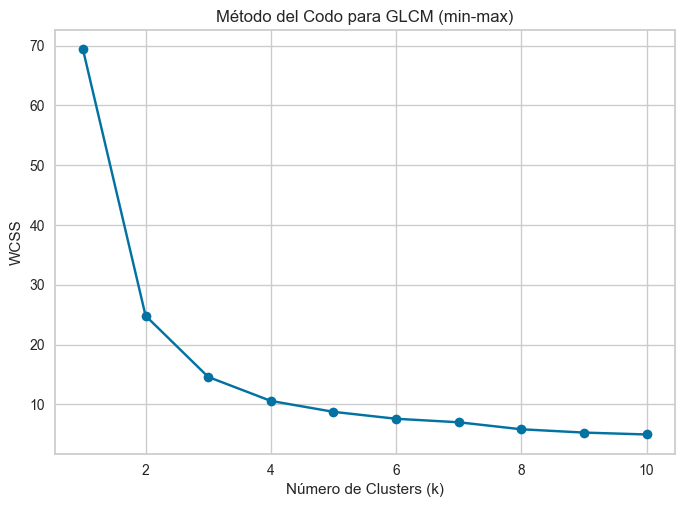

In [12]:
# Método del codo
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, random_state=42)
    kmeans.fit(df_fourier_mm_cl)
    WCSS.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método del Codo para GLCM (min-max)')
plt.grid(True)
plt.show()

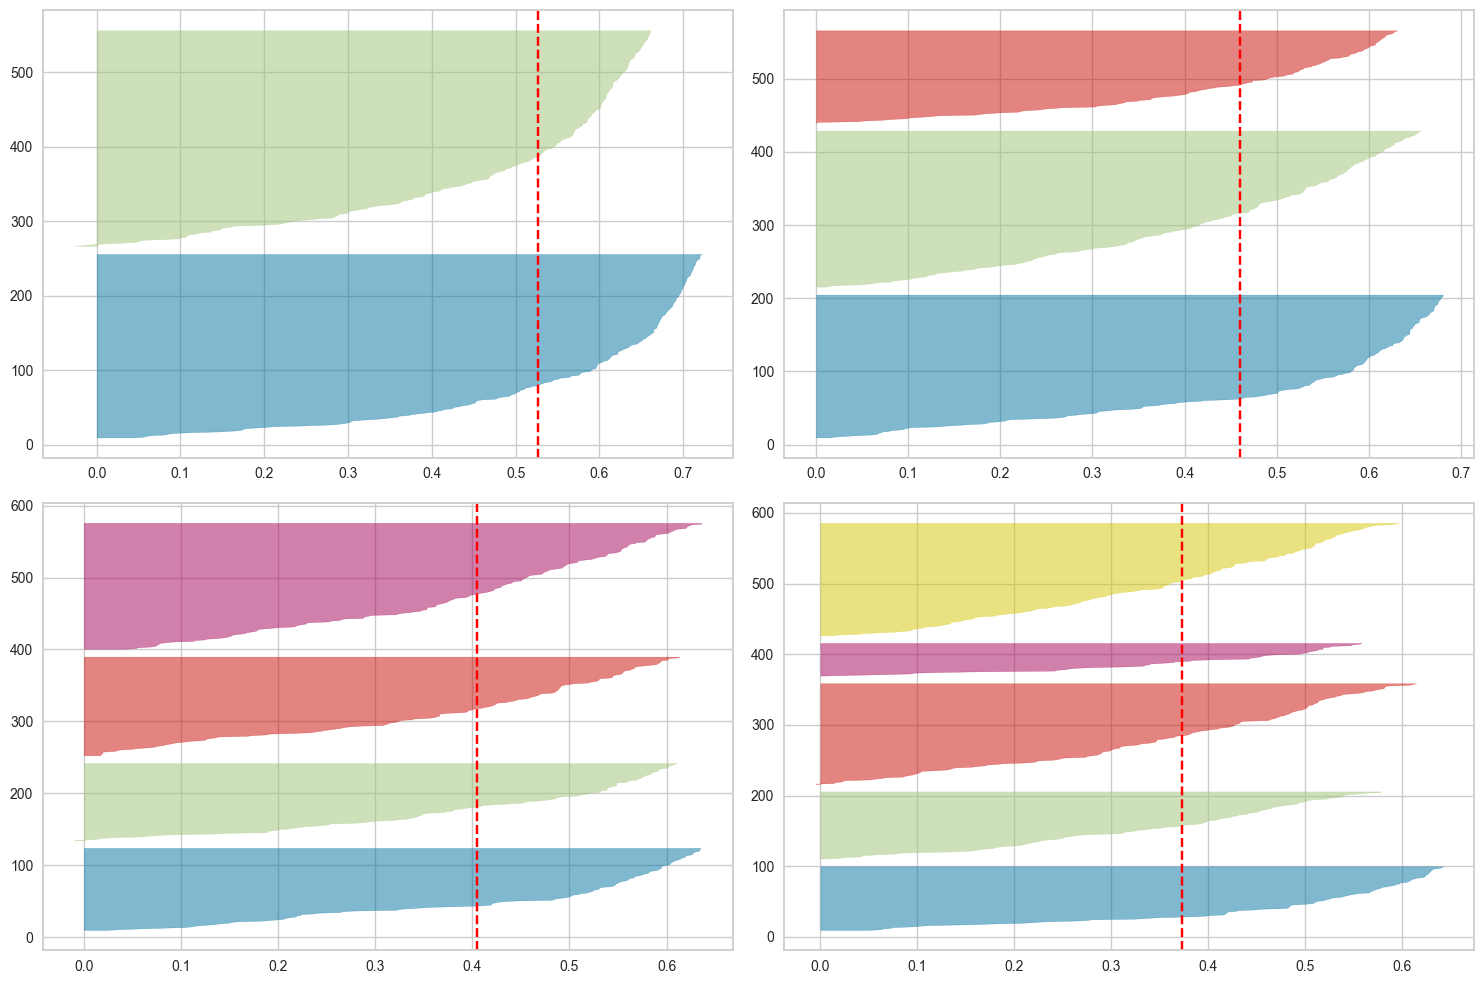

In [14]:
# Creamos la figura con 2x2 subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probamos con k = 2, 3, 4, 5
for i, k in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    
    # Posición del subplot
    row = i // 2
    col = i % 2
    
    # Creamos el visualizador y ajustamos los datos
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(df_fourier_mm_cl)  # Usa tu dataframe ya escalado o transformado

plt.tight_layout()
plt.show()

In [25]:
#Modelo k-means
cluster_fourier_mm= KMeans(init='k-means++',n_clusters=3,random_state=42)
cluster_fourier_mm.fit(df_fourier_mm_cl) 

KMeans(n_clusters=3, random_state=42)

In [26]:
#Se añaden las etiquetas y vemos en una tabla de contigencia cuantos smaller o higher hay en cada cluster
df_fourier_mm['Cluster'] = cluster_fourier_mm.labels_
pd.crosstab(df_fourier_mm['Cluster'], df_fourier_mm['label'])

label,higher,smaller
Cluster,,
0,12,184
1,122,6
2,134,79


In [27]:
silhouette_avg_fourier_mm = silhouette_score(df_fourier_mm_cl, cluster_fourier_mm.labels_)
print(f'Índice de silueta promedio: {silhouette_avg_fourier_mm}')

Índice de silueta promedio: 0.4599660152855444
